<a href="https://colab.research.google.com/github/ClaudixoPG/ML_DSI/blob/main/Tarea_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

In [ ]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load auto mpg dataset from sns
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

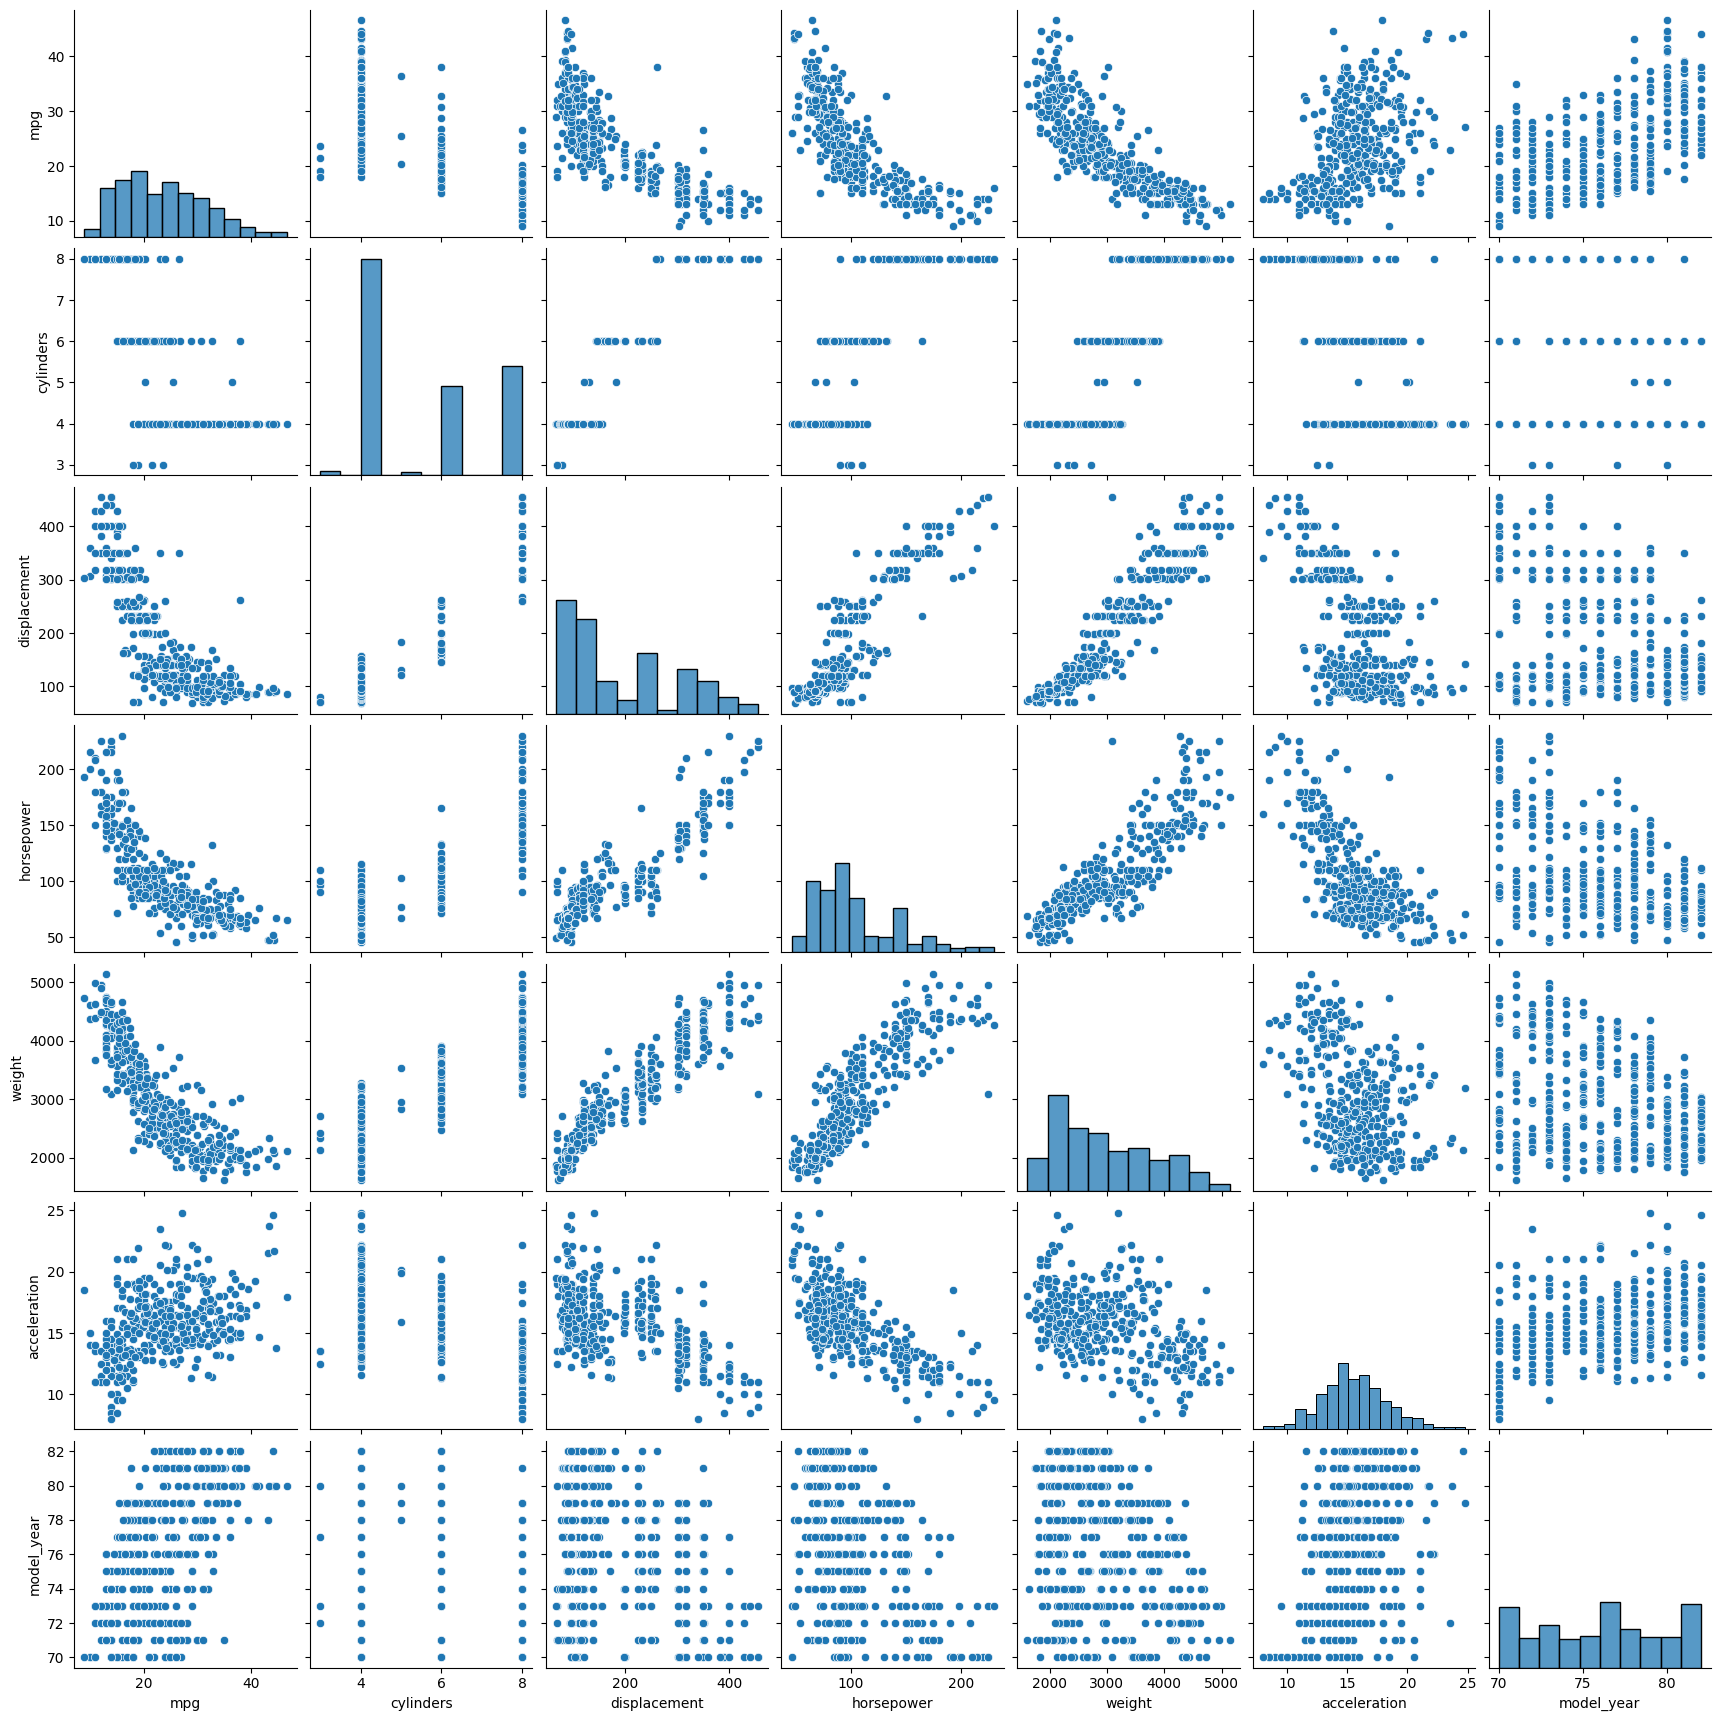

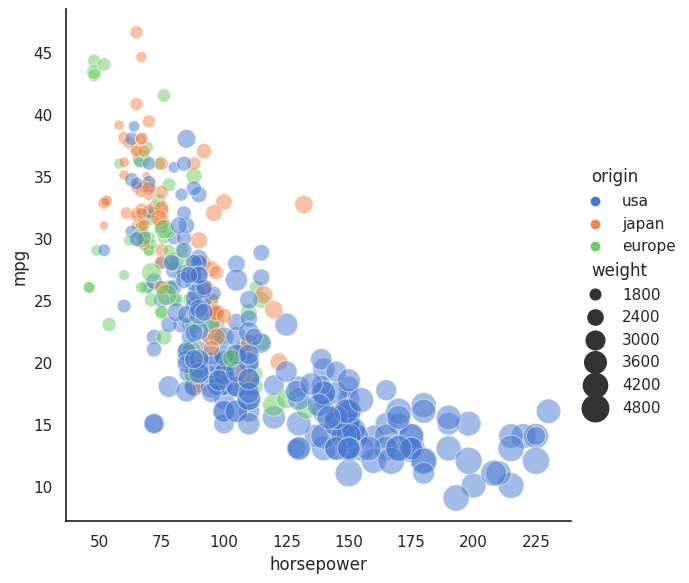

In [ ]:
#Create a plot matrix to see the relationship between variables
sns.pairplot(df)

#crate a scatter plot of horsepower vs mpg and show the plot
sns.set_theme(style="white")
#sns.scatterplot(x='horsepower', y='mpg', data=df)
#plt.show()
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos

<Axes: >

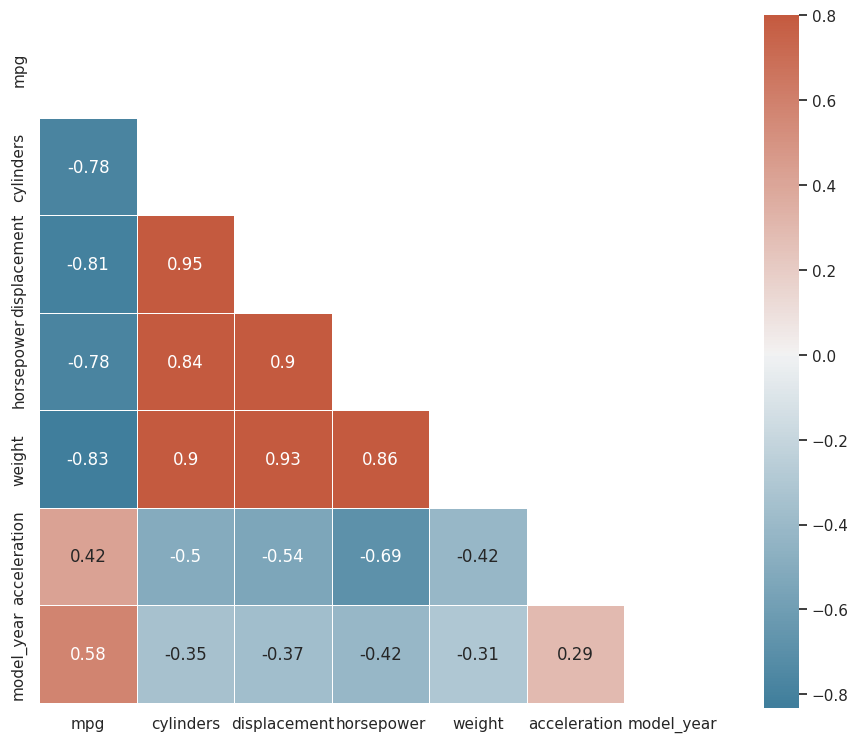

In [ ]:
#drop the name and origin columns, then drop null values
df.drop(['name','origin'], axis=1, inplace=True)
df.dropna(inplace=True)

#Correlation Matrix
corrMatrix = df.corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatrix, mask=mask, cmap=cmap, vmax=.8, center=0, square=True, linewidths=.5,annot=True)


3) (1 punto) Construir y entrenar un modelo de regresion lineal


In [ ]:
#Use sklearn to train a lineal regression model to predict mpg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#split the data into training and testing sets
X = df.drop('mpg', axis=1)
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#train the model
lm = LinearRegression()
lm.fit(X_train,y_train)

#evaluate the model
print(lm.intercept_)
print(lm.coef_)
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

cdf



-21.314199784968782
[ 0.07938235  0.00720029  0.00957313 -0.00769009  0.22996988  0.80728104]


,Coeff
cylinders,0.079382
displacement,0.007200
horsepower,0.009573
weight,-0.007690
acceleration,0.229970
model_year,0.807281


4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

MAE: 2.540715184288639
MSE: 9.264660636837522
RMSE: 3.0437905047551355
R2: 0.8193102695136949


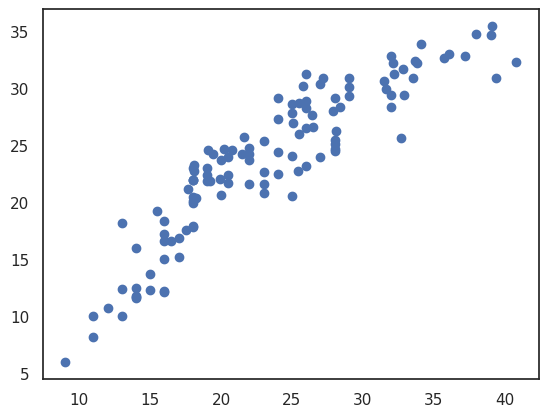

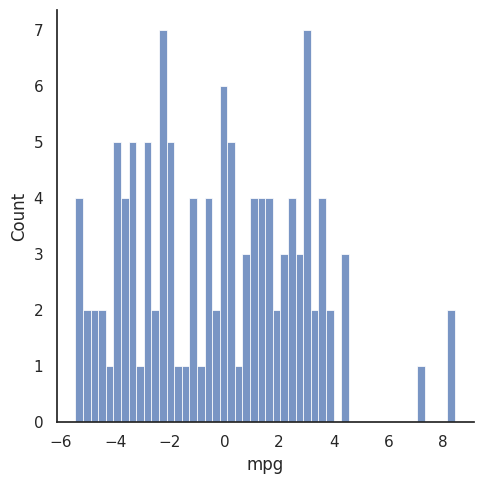

In [ ]:
#Predictions from our model
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
sns.displot((y_test-predictions),bins=50);

#Regression Evaluation Metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', metrics.r2_score(y_test, predictions))

5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


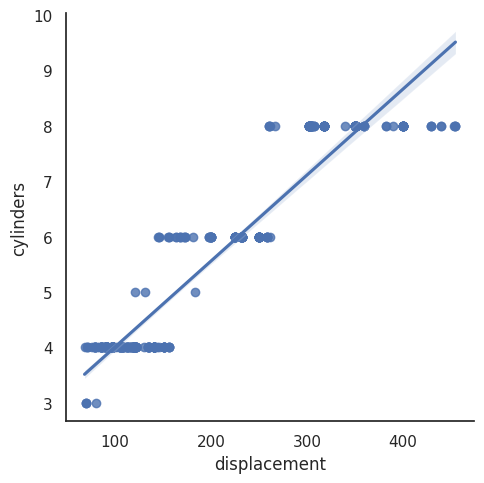

In [ ]:
#Create lmplot to see the relationship between displacement and cylinders
sns.lmplot(x='displacement',y='cylinders',data=df)
plt.show()

6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.